# 0. Install and Import dependencies

In [1]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

^C


In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from sb3_contrib import RecurrentPPO
from stable_baselines3 import PPO
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [2]:
df1 = pd.read_csv('EURUSD_Candlestick_15_M_BID_16.01.2023-21.01.2023.csv')

In [3]:
df1.head()
df = df1.drop("Volume", axis = 1)

In [4]:
df['Local time'] = pd.to_datetime(df['Local time'])
df.dtypes

Local time    datetime64[ns, pytz.FixedOffset(-60)]
Open                                        float64
High                                        float64
Low                                         float64
Close                                       float64
dtype: object

In [5]:
df.sort_values('Local time', ascending=True, inplace=True)
df.head()

,Local time,Open,High,Low,Close
0,2023-01-16 00:00:00-01:00,1.08317,1.08333,1.08259,1.08261
1,2023-01-16 00:15:00-01:00,1.08260,1.08265,1.08201,1.08219
2,2023-01-16 00:30:00-01:00,1.08219,1.08307,1.08217,1.08279
3,2023-01-16 00:45:00-01:00,1.08279,1.08279,1.08221,1.08225
4,2023-01-16 01:00:00-01:00,1.08224,1.08330,1.08211,1.08310


In [6]:
df.set_index('Local time', inplace=True)
df.head()

,Open,High,Low,Close
Local time,,,,
2023-01-16 00:00:00-01:00,1.08317,1.08333,1.08259,1.08261
2023-01-16 00:15:00-01:00,1.08260,1.08265,1.08201,1.08219
2023-01-16 00:30:00-01:00,1.08219,1.08307,1.08217,1.08279
2023-01-16 00:45:00-01:00,1.08279,1.08279,1.08221,1.08225
2023-01-16 01:00:00-01:00,1.08224,1.08330,1.08211,1.08310


In [7]:
env = gym.make('stocks-v0', df=df, frame_bound=(0,400), window_size=0)

In [8]:
env.signal_features

array([[ 1.08261e+00,  0.00000e+00],
       [ 1.08219e+00, -4.20000e-04],
       [ 1.08279e+00,  6.00000e-04],
       [ 1.08225e+00, -5.40000e-04],
       [ 1.08310e+00,  8.50000e-04],
       [ 1.08314e+00,  4.00000e-05],
       [ 1.08364e+00,  5.00000e-04],
       [ 1.08416e+00,  5.20000e-04],
       [ 1.08433e+00,  1.70000e-04],
       [ 1.08461e+00,  2.80000e-04],
       [ 1.08537e+00,  7.60000e-04],
       [ 1.08678e+00,  1.41000e-03],
       [ 1.08688e+00,  1.00000e-04],
       [ 1.08730e+00,  4.20000e-04],
       [ 1.08691e+00, -3.90000e-04],
       [ 1.08665e+00, -2.60000e-04],
       [ 1.08618e+00, -4.70000e-04],
       [ 1.08625e+00,  7.00000e-05],
       [ 1.08606e+00, -1.90000e-04],
       [ 1.08599e+00, -7.00000e-05],
       [ 1.08598e+00, -1.00000e-05],
       [ 1.08626e+00,  2.80000e-04],
       [ 1.08593e+00, -3.30000e-04],
       [ 1.08526e+00, -6.70000e-04],
       [ 1.08573e+00,  4.70000e-04],
       [ 1.08542e+00, -3.10000e-04],
       [ 1.08584e+00,  4.20000e-04],
 

# 2. Build Environment

In [11]:
env.action_space

Discrete(2)

In [12]:
def mytarget1( state, df = df):
    ac = None
    
    for line in range(len(state)):
        if state[line] == None:
            state[line] = 1
            entry = list(df['entry'])
            smm = list(df['SMA12'])
            smb = list(df['SMA30'])
            sig = list(df['signal'])
            if sig[line] == 0 or sig[line] == 1 :
                    return 1, state
            if sig[line] == -1:
                     return 0, state
                            
    
            ''' if  entry[line]==2 and smm[line] == 2: 
                ac =  1
            elif  entry[line]== -2 and smb[line] == -2:
                ac = 0
    
             return ac, state'''

In [13]:
lenght = len(df)
state = env.reset()
mem = [None] * lenght
while True: 
    
    action, mem = mytarget1(mem)
 
    #print(action)
    #action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

KeyError: 'entry'

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [3]:
!pip install finta

     --------------------------------------- 10.9/10.9 MB 94.6 kB/s eta 0:00:00
     ------------------------------------- 499.4/499.4 kB 41.2 kB/s eta 0:00:00
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)


In [9]:
from gym_anytrading.envs import StocksEnv #stocks_env
from finta import TA

## 2.1.2. Fix Volume Column

In [283]:
#df['Volume'] = df['Volume'].apply(lambda x: x.replace(",", ""))
#df.drop("Volume", axis = 1)

In [10]:
df.dtypes

Open     float64
High     float64
Low      float64
Close    float64
dtype: object

## 2.1.3. Calculate SMA, RSI and OBV

In [11]:
import pandas_ta as ta
#df['MACD'], _, df['signal'] = df.ta.macd(5)
#df['MACD'], df['signal'] = TA.MACD(df, 1)
#df['SMA30'] = TA.SMA(df, 30)
df['SMA12'] = df.ta.sma(length=3)
df['SMA30'] = df.ta.sma(length=6)
df['RSI'] = TA.RSI(df)
#df['OBV'] = TA.OBV(df)

pip = TA.ATR(df)
df.fillna(0, inplace=True)

In [12]:
df['signal'] = np.where(df['SMA12'] > df['SMA30'], 1, 0)
df['signal'] = np.where(df['SMA12'] < df['SMA30'], -1, df['signal'])
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,SMA12,SMA30,RSI,signal
Local time,,,,,,,,
2023-01-16 00:00:00-01:00,1.08317,1.08333,1.08259,1.08261,0.000000,0.0,0.000000,0
2023-01-16 00:15:00-01:00,1.08260,1.08265,1.08201,1.08219,0.000000,0.0,0.000000,0
2023-01-16 00:30:00-01:00,1.08219,1.08307,1.08217,1.08279,1.082530,0.0,60.606061,1
2023-01-16 00:45:00-01:00,1.08279,1.08279,1.08221,1.08225,1.082410,0.0,38.179148,1
2023-01-16 01:00:00-01:00,1.08224,1.08330,1.08211,1.08310,1.082713,0.0,62.009764,1


In [13]:
df['return'] = np.log(df['Close']).diff()
df['system_return'] = df['signal'] * df['return']
df['entry'] = df.signal.diff()
df[500:]

,Open,High,Low,Close,SMA12,SMA30,RSI,signal,return,system_return,entry
Local time,,,,,,,,,,,
2023-01-21 05:00:00-01:00,1.08549,1.08549,1.08549,1.08549,1.08549,1.08549,61.127803,0,0.0,0.0,0.0
2023-01-21 05:15:00-01:00,1.08549,1.08549,1.08549,1.08549,1.08549,1.08549,61.127803,0,0.0,0.0,0.0
2023-01-21 05:30:00-01:00,1.08549,1.08549,1.08549,1.08549,1.08549,1.08549,61.127803,0,0.0,0.0,0.0
2023-01-21 05:45:00-01:00,1.08549,1.08549,1.08549,1.08549,1.08549,1.08549,61.127803,0,0.0,0.0,0.0
2023-01-21 06:00:00-01:00,1.08549,1.08549,1.08549,1.08549,1.08549,1.08549,61.127803,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-21 22:45:00-01:00,1.08549,1.08549,1.08549,1.08549,1.08549,1.08549,61.127803,0,0.0,0.0,0.0
2023-01-21 23:00:00-01:00,1.08549,1.08549,1.08549,1.08549,1.08549,1.08549,61.127803,0,0.0,0.0,0.0
2023-01-21 23:15:00-01:00,1.08549,1.08549,1.08549,1.08549,1.08549,1.08549,61.127803,0,0.0,0.0,0.0


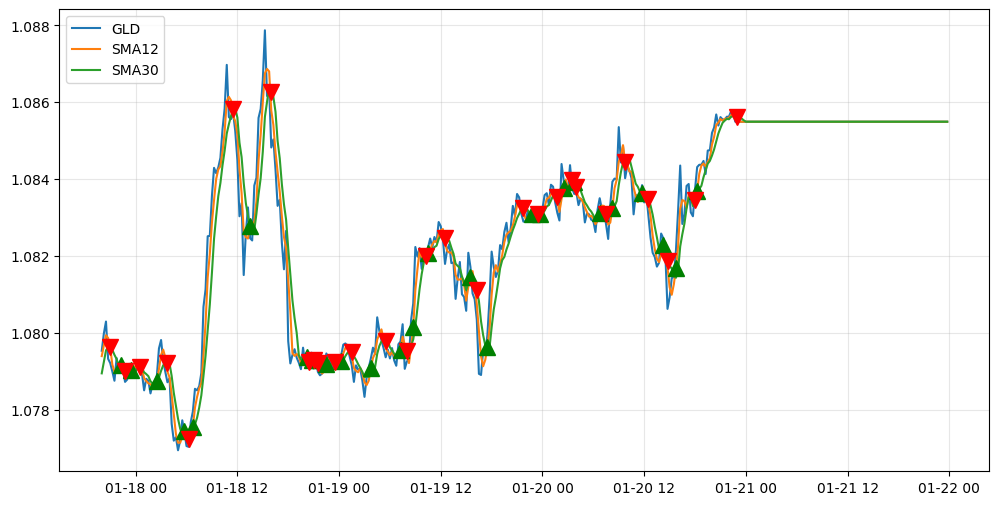

In [14]:

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 12, 6
plt.grid(True, alpha = .3)
plt.plot(df.iloc[-400:]['Close'], label = 'GLD')
plt.plot(df.iloc[-400:]['SMA12'], label = 'SMA12')
plt.plot(df.iloc[-400:]['SMA30'], label = 'SMA30')
plt.plot(df[-400:].loc[df.entry == 2].index, df[-400:]['SMA12'][df.entry == 2], '^',
         color = 'g', markersize = 12)
plt.plot(df[-400:].loc[df.entry == -2].index, df[-400:]['SMA30'][df.entry == -2], 'v',
         color = 'r', markersize = 12)
plt.legend(loc=2);

In [15]:
df.head(15)

,Open,High,Low,Close,SMA12,SMA30,RSI,signal,return,system_return,entry
Local time,,,,,,,,,,,
2023-01-16 00:00:00-01:00,1.08317,1.08333,1.08259,1.08261,0.000000,0.000000,0.000000,0,NaN,NaN,NaN
2023-01-16 00:15:00-01:00,1.08260,1.08265,1.08201,1.08219,0.000000,0.000000,0.000000,0,-0.000388,-0.000000,0.0
2023-01-16 00:30:00-01:00,1.08219,1.08307,1.08217,1.08279,1.082530,0.000000,60.606061,1,0.000554,0.000554,1.0
2023-01-16 00:45:00-01:00,1.08279,1.08279,1.08221,1.08225,1.082410,0.000000,38.179148,1,-0.000499,-0.000499,0.0
2023-01-16 01:00:00-01:00,1.08224,1.08330,1.08211,1.08310,1.082713,0.000000,62.009764,1,0.000785,0.000785,0.0
2023-01-16 01:15:00-01:00,1.08309,1.08357,1.08309,1.08314,1.082830,1.082680,62.737704,1,0.000037,0.000037,0.0
2023-01-16 01:30:00-01:00,1.08316,1.08403,1.08316,1.08364,1.083293,1.082852,70.378315,1,0.000462,0.000462,0.0
2023-01-16 01:45:00-01:00,1.08367,1.08441,1.08363,1.08416,1.083647,1.083180,75.910579,1,0.000480,0.000480,0.0
2023-01-16 02:00:00-01:00,1.08414,1.08446,1.08405,1.08433,1.084043,1.083437,77.396832,1,0.000157,0.000157,0.0


In [16]:

pipdiff = 15*1e-5 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL


def mytarget(barsupfront, df):
    length = len(df)
    high = list(df['High'])
    low = list(df['Low'])
    close = list(df['Close'])
    open = list(df['Open'])
    trendcat = [None] * length
   
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)
            
            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                  #if ma_small[line+1] < ma_big[line+1] and high[line+1] < ma_big[line+1]:
                    trendcat[line] = 1           #-1 downtrend
                    break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                  #if ma_small[line+1] > ma_big[line+1] and high[line+1] > ma_big[line+1]:
                    trendcat[line] = 2           # uptrend
                    break
            else:
                trendcat[line] = 0               # no clear trend

    return trendcat

In [17]:
df['mytarget'] = mytarget(10, df)
df

,Open,High,Low,Close,SMA12,SMA30,RSI,signal,return,system_return,entry,mytarget
Local time,,,,,,,,,,,,
2023-01-16 00:00:00-01:00,1.08317,1.08333,1.08259,1.08261,0.000000,0.00000,0.000000,0,NaN,NaN,NaN,1.0
2023-01-16 00:15:00-01:00,1.08260,1.08265,1.08201,1.08219,0.000000,0.00000,0.000000,0,-0.000388,-0.000000,0.0,2.0
2023-01-16 00:30:00-01:00,1.08219,1.08307,1.08217,1.08279,1.082530,0.00000,60.606061,1,0.000554,0.000554,1.0,1.0
2023-01-16 00:45:00-01:00,1.08279,1.08279,1.08221,1.08225,1.082410,0.00000,38.179148,1,-0.000499,-0.000499,0.0,0.0
2023-01-16 01:00:00-01:00,1.08224,1.08330,1.08211,1.08310,1.082713,0.00000,62.009764,1,0.000785,0.000785,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-21 22:45:00-01:00,1.08549,1.08549,1.08549,1.08549,1.085490,1.08549,61.127803,0,0.000000,0.000000,0.0,NaN
2023-01-21 23:00:00-01:00,1.08549,1.08549,1.08549,1.08549,1.085490,1.08549,61.127803,0,0.000000,0.000000,0.0,NaN
2023-01-21 23:15:00-01:00,1.08549,1.08549,1.08549,1.08549,1.085490,1.08549,61.127803,0,0.000000,0.000000,0.0,NaN


## 2.1.4. Create New Environments

In [18]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','SMA12','SMA30', 'RSI','entry' ]].to_numpy()[start:end]
    return prices, signal_features

In [19]:
from gym_anytrading.envs.trading_env import TradingEnv, Actions, Positions


def  _update_profit1(env, action):
        trade = False
        if ((action == Actions.Buy.value and env._position == Positions.Short) or
            (action == Actions.Sell.value and env._position == Positions.Long)):
            trade = True

        if trade or env._done:
            current_price = env.prices[env._current_tick]
            last_trade_price = env.prices[env._last_trade_tick]

            price_diff = current_price - last_trade_price
            if env.unit_side == 'left':
                if env._position == Positions.Short and price_diff < 0:
                    quantity = env._total_profit * (last_trade_price - env.trade_fee)
                    env._total_profit = quantity / current_price

            elif env.unit_side == 'right':
                if env._position == Positions.Long and price_diff > 0:
                    quantity = env._total_profit / last_trade_price
                    env._total_profit = quantity * (current_price - env.trade_fee)
                    
                    
def _calculate_reward1(env, action):
        step_reward = 0  # pip

        trade = False
        if ((action == Actions.Buy.value and env._position == Positions.Short ) or
            (action == Actions.Sell.value and env._position == Positions.Long)):
            trade = True

        if trade:
            
            current_price = env.prices[env._current_tick]
            last_trade_price = env.prices[env._last_trade_tick]
            price_diff = current_price - last_trade_price
            if action == Actions.Buy.value and price_diff > 0: 
                if env._position == Positions.Short:
                    step_reward += -price_diff * 10000
            elif action == Actions.Sell.value and price_diff < 0:
                if env._position == Positions.Long:
                    step_reward += price_diff * 10000

            else:
                step_reward += -10
                
        return step_reward


In [20]:
from gym_anytrading.envs import ForexEnv #StocksEnv #stocks_env
class MyCustomEnv(ForexEnv): 
    _process_data = add_signals
    #_calculate_reward = _calculate_reward1
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,112))

In [21]:
env2.signal_features

array([[ 1.08259   ,  0.        ,  0.        ,  0.        ,         nan],
       [ 1.08201   ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.08217   ,  1.08253   ,  0.        , 60.60606061,  1.        ],
       [ 1.08221   ,  1.08241   ,  0.        , 38.17914831,  0.        ],
       [ 1.08211   ,  1.08271333,  0.        , 62.00976422,  0.        ],
       [ 1.08309   ,  1.08283   ,  1.08268   , 62.73770432,  0.        ],
       [ 1.08316   ,  1.08329333,  1.08285167, 70.37831549,  0.        ],
       [ 1.08363   ,  1.08364667,  1.08318   , 75.91057919,  0.        ],
       [ 1.08405   ,  1.08404333,  1.08343667, 77.39683202,  0.        ],
       [ 1.08431   ,  1.08436667,  1.08383   , 79.62643325,  0.        ],
       [ 1.08462   ,  1.08477   ,  1.08420833, 84.1861327 ,  0.        ],
       [ 1.08525   ,  1.08558667,  1.084815  , 89.07245383,  0.        ],
       [ 1.08654   ,  1.08634333,  1.085355  , 89.32439661,  0.        ],
       [ 1.0868    ,  1.08698667,  1.0

In [42]:
df.head()

,Open,High,Low,Close,SMA12,SMA30,RSI,signal,return,system_return,entry,mytarget
Local time,,,,,,,,,,,,
2023-01-16 00:00:00-01:00,1.08317,1.08333,1.08259,1.08261,0.000000,0.0,0.000000,0,NaN,NaN,NaN,1.0
2023-01-16 00:15:00-01:00,1.08260,1.08265,1.08201,1.08219,0.000000,0.0,0.000000,0,-0.000388,-0.000000,0.0,2.0
2023-01-16 00:30:00-01:00,1.08219,1.08307,1.08217,1.08279,1.082530,0.0,60.606061,1,0.000554,0.000554,1.0,1.0
2023-01-16 00:45:00-01:00,1.08279,1.08279,1.08221,1.08225,1.082410,0.0,38.179148,1,-0.000499,-0.000499,0.0,0.0
2023-01-16 01:00:00-01:00,1.08224,1.08330,1.08211,1.08310,1.082713,0.0,62.009764,1,0.000785,0.000785,0.0,2.0


# 3. Build Environment and Train

In [22]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

net_arch = [dict(pi=[5,1500, 1500, 2], vf=[5,1500, 1500, 2])]

In [23]:
model1 = PPO("MlpPolicy", env, verbose=1, policy_kwargs={'net_arch':net_arch})
model1.learn(total_timesteps=1500000)

Using cpu device


C:\Users\Emakam leumassa\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\policies.py:458: UserWarning: As shared layers in the mlp_extractor are deprecated and will be removed in SB3 v1.8.0, you should now pass directly a dictionary and not a list (net_arch=dict(pi=..., vf=...) instead of net_arch=[dict(pi=..., vf=...)])
  warnings.warn(


-----------------------------
| time/              |      |
|    fps             | 452  |
|    iterations      | 1    |
|    time_elapsed    | 4    |
|    total_timesteps | 2048 |
-----------------------------


KeyboardInterrupt: 

#### 4. Evaluation

In [24]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(90,300))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model1.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': -169.7999999999955, 'total_profit': 0.9804385612818535, 'position': <Positions.Short: 0>}


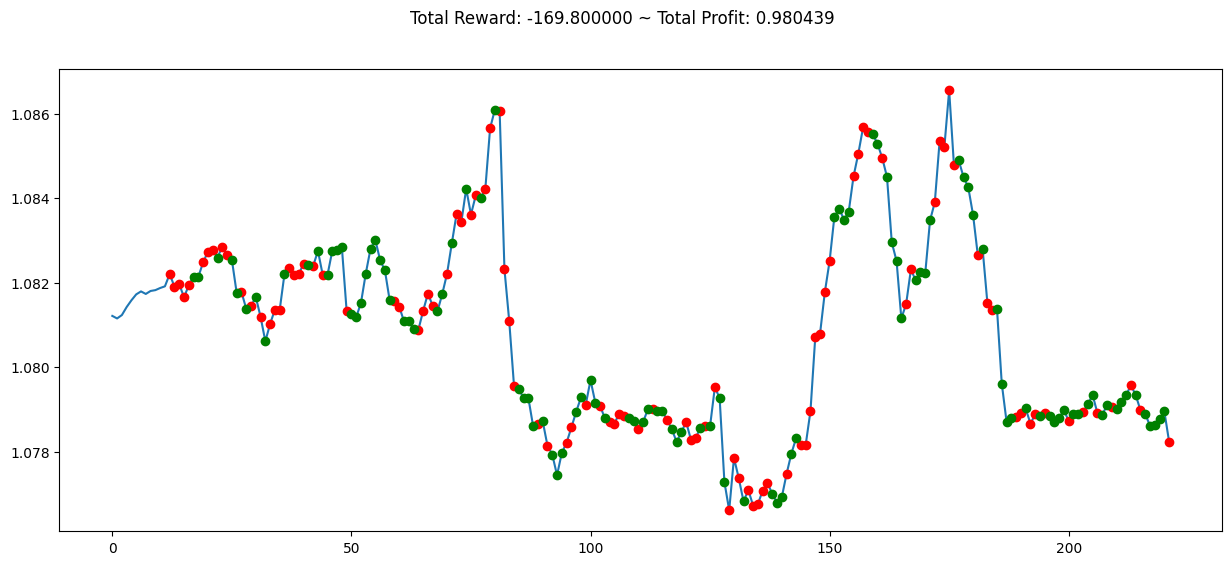

In [25]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [28]:
import os

reccurent_ppo = os.path.join('training', 'save_model', 'reccurent Rl3')
model1.save(reccurent_ppo)

del model1

NameError: name 'model1' is not defined

In [29]:
model =  RecurrentPPO.load(reccurent_ppo, env = env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


ValueError: Observation spaces do not match: Box([[-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf]], [[inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf inf inf inf]], (12, 10), float64) != Box([[-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]
 [-inf -inf -inf -inf -inf]], [[inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]
 [inf inf inf inf inf]], (12, 5), float64)

In [58]:
from stable_baselines3.common.callbacks import Evalcallback, StopTrainingonrewardThreshold

stop = StopTrainingonrewardThreshold(reward_threshold = 200, verbose = 1)
eval_callback = Evalcallback(env,
                        callback_on_new_best = stop_callback,
                         eval_freq = 10000,
                         best_model_save_path = reccurent_ppo,
                         verbose = 1)

ImportError: cannot import name 'Evalcallback' from 'stable_baselines3.common.callbacks' (C:\Users\Emakam leumassa\AppData\Local\Programs\Python\Python310\lib\site-packages\stable_baselines3\common\callbacks.py)